# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from pprint import pprint

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

tempunits="imperial"

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
MaxTemp=[]
WindSpeed=[]

setnumber=0
recordnumber=0

print("Beginning Data Retrieval")     
print("-----------------------------")

#Loop through the random cities from citipy
for city in cities:
    
    #Not all states will be found on openweather and we want the code to keep looping so make a try
    try:
        #Use openweather api
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + tempunits
        weather_response = requests.get(query_url).json()
        
        #append lists - need to store to put info into df
        City.append(weather_response["name"])
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Humidity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        MaxTemp.append(weather_response["main"]["temp_max"])
        WindSpeed.append(weather_response["wind"]["speed"])
        
        if recordnumber>=49:
            recordnumber=1
            setnumber+=1
        elif recordnumber<49:
            recordnumber+=1
            
        print(f'Processing Record {recordnumber} of Set {setnumber} | {city}')
    
    #If city isn't found
    except:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 0 | hermanus
Processing Record 2 of Set 0 | port alfred
Processing Record 3 of Set 0 | olafsvik
Processing Record 4 of Set 0 | berlevag
Processing Record 5 of Set 0 | barrow
Processing Record 6 of Set 0 | yellowknife
Processing Record 7 of Set 0 | euclides da cunha
City not found. Skipping...
Processing Record 8 of Set 0 | busselton
Processing Record 9 of Set 0 | karimganj
Processing Record 10 of Set 0 | thinadhoo
Processing Record 11 of Set 0 | cape town
Processing Record 12 of Set 0 | kyaikkami
Processing Record 13 of Set 0 | ushuaia
Processing Record 14 of Set 0 | hilo
Processing Record 15 of Set 0 | mataura
Processing Record 16 of Set 0 | srandakan
Processing Record 17 of Set 0 | dikson
Processing Record 18 of Set 0 | korem
Processing Record 19 of Set 0 | bredasdorp
Processing Record 20 of Set 0 | puerto ayora
Processing Record 21 of Set 0 | namibe
City not found. Skipping...
Processing Record 22 of S

Processing Record 43 of Set 3 | gagnoa
Processing Record 44 of Set 3 | quatre cocos
Processing Record 45 of Set 3 | port elizabeth
Processing Record 46 of Set 3 | castro
Processing Record 47 of Set 3 | belyy yar
Processing Record 48 of Set 3 | wonthaggi
Processing Record 49 of Set 3 | ostersund
Processing Record 1 of Set 4 | kjollefjord
Processing Record 2 of Set 4 | goderich
Processing Record 3 of Set 4 | tabas
Processing Record 4 of Set 4 | veraval
Processing Record 5 of Set 4 | pontal do parana
Processing Record 6 of Set 4 | avarua
Processing Record 7 of Set 4 | provideniya
City not found. Skipping...
Processing Record 8 of Set 4 | sal rei
Processing Record 9 of Set 4 | esperance
Processing Record 10 of Set 4 | hualmay
Processing Record 11 of Set 4 | constitucion
Processing Record 12 of Set 4 | sambava
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 4 | marsh harbour
Processing Record 14 of Set 4 | araouane
Processing Record 15 of Set 4 | vesoul
P

Processing Record 37 of Set 7 | warsaw
Processing Record 38 of Set 7 | falmouth
Processing Record 39 of Set 7 | ottawa
Processing Record 40 of Set 7 | beckley
Processing Record 41 of Set 7 | lagunas
Processing Record 42 of Set 7 | kupang
Processing Record 43 of Set 7 | antofagasta
Processing Record 44 of Set 7 | sovetskiy
Processing Record 45 of Set 7 | los llanos de aridane
Processing Record 46 of Set 7 | lusambo
Processing Record 47 of Set 7 | broken hill
Processing Record 48 of Set 7 | talara
Processing Record 49 of Set 7 | tulagi
Processing Record 1 of Set 8 | dawei
City not found. Skipping...
Processing Record 2 of Set 8 | nizhniy tsasuchey
Processing Record 3 of Set 8 | mount gambier
Processing Record 4 of Set 8 | tura
Processing Record 5 of Set 8 | nelson bay
Processing Record 6 of Set 8 | pimenteiras
Processing Record 7 of Set 8 | sulangan
Processing Record 8 of Set 8 | birao
Processing Record 9 of Set 8 | vuktyl
Processing Record 10 of Set 8 | avera
Processing Record 11 of Set

Processing Record 28 of Set 11 | saint-georges
Processing Record 29 of Set 11 | tabou
Processing Record 30 of Set 11 | cururupu
Processing Record 31 of Set 11 | omsukchan
Processing Record 32 of Set 11 | gravelbourg
Processing Record 33 of Set 11 | kogon
Processing Record 34 of Set 11 | ginir
Processing Record 35 of Set 11 | quelimane
Processing Record 36 of Set 11 | zhoucheng
Processing Record 37 of Set 11 | northam
City not found. Skipping...
Processing Record 38 of Set 11 | pimentel
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 11 | antananarivo
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create DataFrame
weather_information={"City":City, "Cloudiness":Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity,"Lat":Lat,
                    "Lng":Lng,"Max Temp":MaxTemp, "Wind Speed":WindSpeed}
weather_df=pd.DataFrame(weather_information)
weather_df.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

In [5]:
#Display DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,100,ZA,1586634368,87,-34.42,19.23,64.99,10.00
1,Port Alfred,97,ZA,1586634369,91,-33.59,26.89,68.00,7.00
2,Olafsvik,60,IS,1586634369,79,64.89,-23.71,37.24,28.39
3,Berlevåg,79,NO,1586634369,90,70.86,29.09,25.02,3.24
4,Barrow,90,US,1586634369,84,71.29,-156.79,-2.20,11.41


In [6]:
#Exporting DataFrame to csv
weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

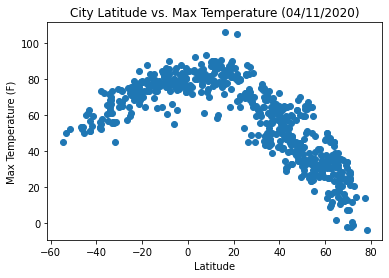

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])


today = date.today().strftime("%m/%d/%Y")

#pull date from time module
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

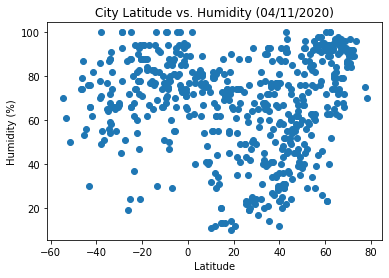

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

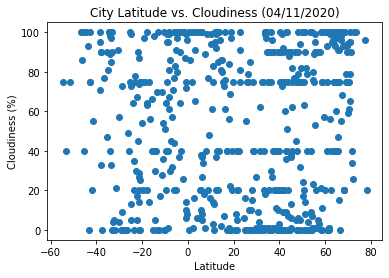

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

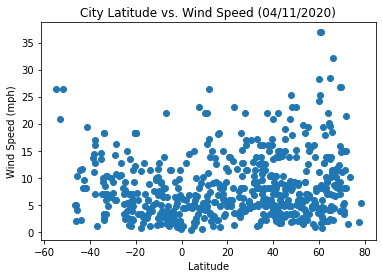

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern Hemisphere DataFrame (greater than or equal to 0 degrees latitude)
northernhem=weather_df.loc[weather_df["Lat"]>=0]
northernhem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Olafsvik,60,IS,1586634369,79,64.89,-23.71,37.24,28.39
3,Berlevåg,79,NO,1586634369,90,70.86,29.09,25.02,3.24
4,Barrow,90,US,1586634369,84,71.29,-156.79,-2.20,11.41
5,Yellowknife,20,CA,1586634290,52,62.46,-114.35,16.00,12.75
8,Karīmganj,0,IN,1586634370,49,24.87,92.35,72.12,3.20


In [13]:
# Create Southern Hemisphere DataFrame (less than 0 degrees latitude)
southernhem=weather_df.loc[weather_df["Lat"]<0]
southernhem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,100,ZA,1586634368,87,-34.42,19.23,64.99,10.00
1,Port Alfred,97,ZA,1586634369,91,-33.59,26.89,68.00,7.00
6,Euclides da Cunha,100,BR,1586634369,51,-10.51,-39.02,81.01,2.48
7,Busselton,85,AU,1586634369,58,-33.65,115.33,70.00,8.48
10,Cape Town,40,ZA,1586634237,88,-33.93,18.42,66.00,18.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7804206669687561


Text(0, 0.5, 'Max Temp')

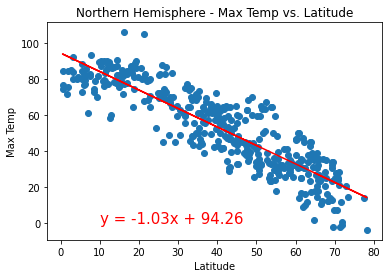

In [14]:
# Calculate the linear regression model for Northern Hemisphere - Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Max Temp'])
print(f'The r-squared value is {rvalue*rvalue}')


#Round terms in the regression and change to strings for the annotate function
regression=northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Max Temp'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(10,0),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.5956455190671863


Text(0, 0.5, 'Max Temp')

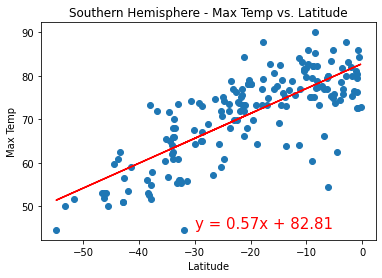

In [15]:
# Calculate the linear regression model for Southern Hemisphere - Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Max Temp'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Max Temp'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-30,45),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.10732195209187328


Text(0, 0.5, 'Humidity')

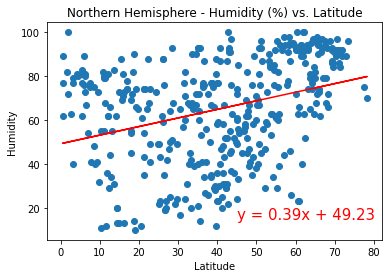

In [16]:
# Calculate the linear regression model for Northern Hemisphere - Humidity vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Humidity'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Humidity'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(45,15),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.059815811746994414


Text(0, 0.5, 'Humidity')

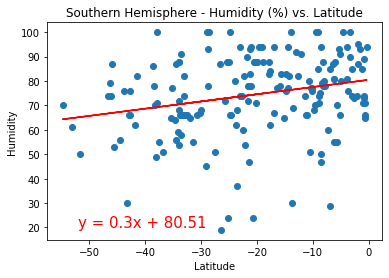

In [22]:
# Calculate the linear regression model for Southern Hemisphere - Humidity vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Humidity'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Humidity'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-52,20),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.028608602455418946


Text(0, 0.5, 'Cloudiness')

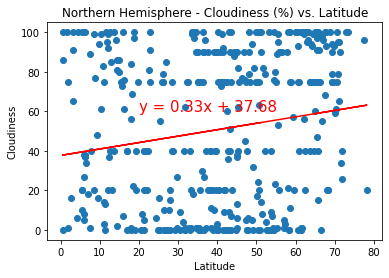

In [18]:
# Calculate the linear regression model for Northern Hemisphere - Cloudiness vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Cloudiness'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Cloudiness'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(20,60),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.00016707474049081113


Text(0, 0.5, 'Cloudiness')

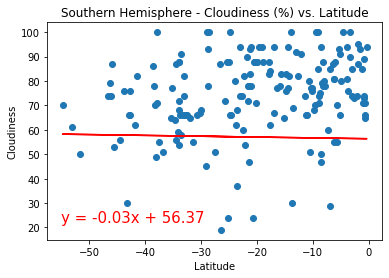

In [23]:
# Calculate the linear regression model for Southern Hemisphere - Cloudiness vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Cloudiness'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Humidity'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-55,22),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.01944050361435995


Text(0, 0.5, 'Wind Speed')

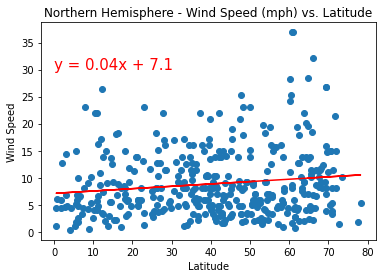

In [24]:
# Calculate the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Wind Speed'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Wind Speed'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(0,30),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.15047832749248902


Text(0, 0.5, 'Wind Speed')

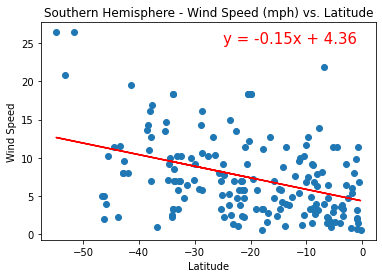

In [21]:
# Calculate the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Wind Speed'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Wind Speed'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-25,25),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')